>>># support vactor classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score  
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle

In [2]:
df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'])
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [4]:
df['year']=df['Date'].map(lambda x:x.year)

In [5]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020


In [6]:
df['year'].describe()

count    18110.000000
mean      2020.443291
std          0.496787
min       2020.000000
25%       2020.000000
50%       2020.000000
75%       2021.000000
max       2021.000000
Name: year, dtype: float64

In [7]:
df['years']=df['year']-2000

In [8]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year,years
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,20
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,20
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,20
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,20
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020,20


In [9]:
df['a']=df['Time'].str.split(':')

In [10]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year,years,a
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,20,"[6, 00 PM]"
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,20,"[6, 00 PM]"
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,20,"[6, 00 PM]"
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,20,"[6, 00 PM]"
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020,20,"[6, 00 PM]"


In [11]:
df['b']=df['a'].map(lambda x :x[0])

In [12]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year,years,a,b
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020,20,"[6, 00 PM]",6
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020,20,"[6, 00 PM]",6
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020,20,"[6, 00 PM]",6
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020,20,"[6, 00 PM]",6
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020,20,"[6, 00 PM]",6


In [13]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed', 'year', 'years', 'a', 'b'],
      dtype='object')

In [14]:
df=df[['State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths','Confirmed','years','b']].rename({'State/UnionTerritory':'state','ConfirmedIndianNational':'ind_national','ConfirmedForeignNational':'for_naional','b':'time_in_hours'},axis=1)

In [15]:
df.head()

,state,ind_national,for_naional,Cured,Deaths,Confirmed,years,time_in_hours
0,Kerala,1,0,0,0,1,20,6
1,Kerala,1,0,0,0,1,20,6
2,Kerala,2,0,0,0,2,20,6
3,Kerala,3,0,0,0,3,20,6
4,Kerala,3,0,0,0,3,20,6


In [16]:
df['ind_national'].value_counts()         # this is imbalanced column

-      17664
1        108
3         73
2         33
4         21
       ...  
168        1
129        1
71         1
177        1
127        1
Name: ind_national, Length: 62, dtype: int64

In [17]:
df['for_naional'].value_counts()              # it is also 

-     17664
0       314
1        39
2        36
14       25
3        12
10        6
8         5
6         3
7         3
11        2
9         1
Name: for_naional, dtype: int64

In [18]:
df['Confirmed'].value_counts()

1         263
2         117
7          92
3          88
33         63
         ... 
58521       1
720799      1
9377        1
1189        1
133119      1
Name: Confirmed, Length: 14971, dtype: int64

In [19]:
df=df.drop(columns=['for_naional','ind_national'])
df.head()

,state,Cured,Deaths,Confirmed,years,time_in_hours
0,Kerala,0,0,1,20,6
1,Kerala,0,0,1,20,6
2,Kerala,0,0,2,20,6
3,Kerala,0,0,3,20,6
4,Kerala,0,0,3,20,6


In [20]:
df.corr()

,Cured,Deaths,Confirmed,years
Cured,1.000000,0.917529,0.997751,0.337670
Deaths,0.917529,1.000000,0.918346,0.242629
Confirmed,0.997751,0.918346,1.000000,0.332204
years,0.337670,0.242629,0.332204,1.000000


Mostly columns are co-related to each other


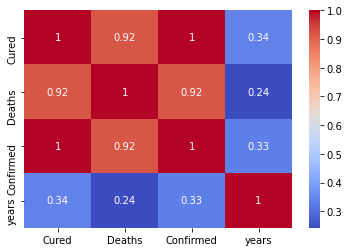

In [21]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
print('Mostly columns are co-related to each other')

In [22]:
# var=sns.pairplot(df,hue='state')
df2=df.iloc[:5000,:]

In [23]:
df2.head()

,state,Cured,Deaths,Confirmed,years,time_in_hours
0,Kerala,0,0,1,20,6
1,Kerala,0,0,1,20,6
2,Kerala,0,0,2,20,6
3,Kerala,0,0,3,20,6
4,Kerala,0,0,3,20,6


In [24]:
df2.shape

(5000, 6)

In [25]:
x=df2.drop(columns=['state','Deaths'])
y=df2[['Deaths']]

In [26]:
x.shape,y.shape

((5000, 4), (5000, 1))

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfr=RandomForestClassifier()

In [31]:
rfr.fit(x_train,y_train)

<ipython-input-31-3f392adc2e88>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


RandomForestClassifier()

In [37]:
rfr.score(x_test,y_test)

0.39

In [39]:
from sklearn.svm import SVC

In [40]:
svc=SVC()

In [41]:
svc.fit(x_train,y_train)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [42]:
svc.score(x_test,y_test)              

0.276

## AGain start on another dataset

In [46]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
dff=pd.DataFrame(np.c_[data.data,data.target],columns=[list(data.feature_names)+['target']])

In [47]:
dff.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [48]:
x=dff.drop('target',axis=1)
y=dff[['target']]

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [49]:
x.shape,y.shape

((569, 30), (569, 1))

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [51]:
rfr2=RandomForestClassifier()

In [54]:
rfr2.fit(x_train,y_train)

<ipython-input-54-5cfc4dfe4ade>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr2.fit(x_train,y_train)


RandomForestClassifier()

In [55]:
rfr2.score(x_test,y_test)               # its a good accuracy

0.9473684210526315

In [56]:
svc2=SVC()

In [57]:
svc2.fit(x_train,y_train)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [58]:
svc2.score(x_test,y_test)                  # its a good accuracy by using svc
# as compared to randomfores this is down

0.8596491228070176

## with feature scaled data

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc=StandardScaler()

In [61]:
sc.fit(x_train)
x_test_sc=sc.transform(x_test)
x_train_sc=sc.transform(x_train)

In [62]:
rfr4=RandomForestClassifier()
rfr4.fit(x_train_sc,y_train)
rfr4.score(x_test_sc,y_test)                # as compared to without scaled data our accuracy is increased

<ipython-input-62-c3dcf9009287>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr4.fit(x_train_sc,y_train)


0.956140350877193

## with feature scaled data svc won from the random forest 97.36 % accuracy 😁😁

In [63]:
svc4=SVC()
svc4.fit(x_train_sc,y_train)
svc4.score(x_test_sc,y_test)       # svc needs feature scaled data

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9736842105263158

In [110]:
svc_pred_sc=svc4.predict(x_test_sc)

In [111]:
svc_pred=svc2.predict(x_test)

In [112]:
rfr_pred_sc=rfr4.predict(x_test_sc)

In [113]:
rfr_pred=rfr2.predict(x_test)

## cross validation of randomforest scaled and non scaled model

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
cross_valtidation=cross_val_score(rfr4,x_test,y_test)    
cross_valtidation

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\py

array([1.        , 0.95652174, 0.95652174, 1.        , 0.90909091])

In [116]:
cross_valtidation

array([1.        , 0.95652174, 0.95652174, 1.        , 0.90909091])

## cross_validation with feature scaled data

In [117]:
cross_valtidation_sc=cross_val_score(rfr4,x_test_sc,y_test)    
cross_valtidation_sc

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\py

array([1.        , 0.95652174, 0.95652174, 0.95652174, 0.90909091])

In [118]:
cross_valtidation_sc

array([1.        , 0.95652174, 0.95652174, 0.95652174, 0.90909091])

## cross validation of SVC scaled and non scaled data

In [119]:
cross_valtidation_svc=cross_val_score(svc4,x_test,y_test)    
cross_valtidation_svc

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vect

array([0.82608696, 0.91304348, 0.86956522, 0.73913043, 0.95454545])

In [120]:
cross_valtidation_svc       #without featured scaled

array([0.82608696, 0.91304348, 0.86956522, 0.73913043, 0.95454545])

In [121]:
cross_valtidation_svc_sc=cross_val_score(svc4,x_test_sc,y_test)    
cross_valtidation_svc_sc

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vect

array([0.95652174, 1.        , 0.91304348, 0.91304348, 0.90909091])

In [122]:
cross_valtidation_svc_sc

array([0.95652174, 1.        , 0.91304348, 0.91304348, 0.90909091])

# mean and root mean square both model with scaled and non scaled

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
svc_mean=mean_squared_error(y_test,svc_pred)
print(svc_mean,'root mean ',np.sqrt(svc_mean))               # IN SVC WITHOUT SCALED DATA

0.14035087719298245 root mean  0.3746343246326776


In [125]:
svc_mean_sc=mean_squared_error(y_test,svc_pred_sc)            
print(svc_mean_sc,'root mean ',np.sqrt(svc_mean_sc))          # IN SVC WITH SCALED DATA

0.02631578947368421 root mean  0.16222142113076254


In [126]:
rfrst_mean=mean_squared_error(y_test,rfr_pred)
print(rfrst_mean,'root mean__ ',np.sqrt(rfrst_mean))              # IN RANDOMFOREST WITHOUT SCALED DATA

0.05263157894736842 root mean__  0.22941573387056177


In [127]:
rfrst_mean_sc=mean_squared_error(y_test,rfr_pred_sc)
print(rfrst_mean_sc,'root mean__ ',np.sqrt(rfrst_mean_sc))              # IN RANDOMFOREST WITH SCALED DATA

0.043859649122807015 root mean__  0.20942695414584775


# as compared to all errros we can say svc with scaled data is best model 😎

In [128]:
### f1_score()

In [129]:
from sklearn.metrics import f1_score                   #  f1_score 😁😁😎

In [130]:
f1_score(y_test,svc_pred_sc)


0.9781021897810218

In [131]:
from sklearn.metrics import r2_score

In [132]:
r2_score(y_test,svc_pred_sc)

0.8913940933629724

In [133]:
### confusion metrics

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
confusion_matrix(y_test,svc_pred_sc)

array([[44,  3],
       [ 0, 67]], dtype=int64)

In [136]:
(44+67)/(44+67+3)            # good accuracy

0.9736842105263158

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
accuracy_score(y_test,svc_pred_sc)         # accuracy score

0.9736842105263158

In [139]:
from sklearn.metrics import classification_report

In [140]:
classification_report(y_test,svc_pred_sc)             # classification report

'              precision    recall  f1-score   support\n\n         0.0       1.00      0.94      0.97        47\n         1.0       0.96      1.00      0.98        67\n\n    accuracy                           0.97       114\n   macro avg       0.98      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n'

# save this model

In [141]:
import pickle

In [142]:
pickle.dump(svc4,open('breast_cancer_model_with_97%','wb'))           # file has been saved

In [143]:
model=pickle.load(open('breast_cancer_model_with_97%','rb'))

In [145]:
model.predict(x_test)             # it is working

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
svc_pred_sc,svc_pred,rfr_pred_sc,rfr_pred

In [156]:
svc_pred_sc.ndim

1

In [154]:
targe=y_test.values

In [158]:
target=targe.ravel()

In [159]:
target.ndim

1

In [161]:
CHECK_DATASET=pd.DataFrame(np.c_[target,svc_pred,svc_pred_sc,rfr_pred,rfr_pred_sc],columns=['main_target','SVC','SVC_SC','RFST','RFST_SC'])

In [163]:
CHECK_DATASET.iloc[0:50,:]

,main_target,SVC,SVC_SC,RFST,RFST_SC
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0
8,1.0,1.0,1.0,1.0,1.0
9,0.0,1.0,0.0,0.0,0.0


# ALL THE BEST ✌🤞✌🤞👍